# Load Python Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

from sklearn import set_config
set_config(display="diagram")

# Packages to prevent any warnings from being displayed (not neccessary but useful)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing the dataset into a pandas dataframe
df = pd.read_csv('blueberry.csv')
df

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


# Primary Exploratory Data Analysis

In [3]:
# Printing the first 5 rows of the dataset
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
# Printing the last 5 rows of the dataset
df.tail()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


In [5]:
# Printing the number of columns in the dataset
len(df.columns)

18

In [6]:
# Printing the number of rows in the dataset
len(df)

777

In [7]:
# Printing the shape of the data frame (ensuring it is 2-dimensional)
df.shape

(777, 18)

In [8]:
# Printing the size of the data frame (number of rows x number of columns)
df.size

13986

In [9]:
# Printing the labels of the columns
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [10]:
# Printing basic in formation about each column (label, number of non-null values, data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [11]:
# Printing the basic statistical information of all columns (mean, standard deviation, minimum value, maximum value and
# percentiles [25%, 50%, 75%])
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [12]:
# Printing the data types of each column
# All columns are of float64 data type except of the 'Row#' column (not important column)
df.dtypes

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

# Data Preprocessing

In [13]:
# Finding if there are any null values in each column
# No null values are to be found
df.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [14]:
# Finding if there are any duplicated values in each column
# No duplicated vales are to be found
df.duplicated().sum()

0

In [15]:
# Dropping unneccesary columns
df.drop(['Row#'], axis = 'columns', inplace = True)
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


Skewness value of Yield: -0.3218576220812626


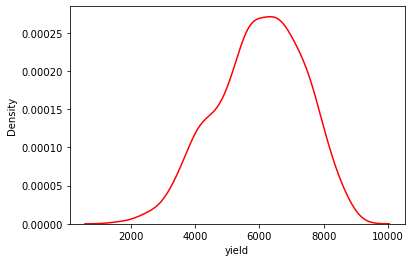

In [16]:
# Checking the skewness of the target variable
sns.kdeplot(df['yield'], color='r')
print('Skewness value of Yield:', df['yield'].skew())
# The skewness is negative and is within the acceptable range

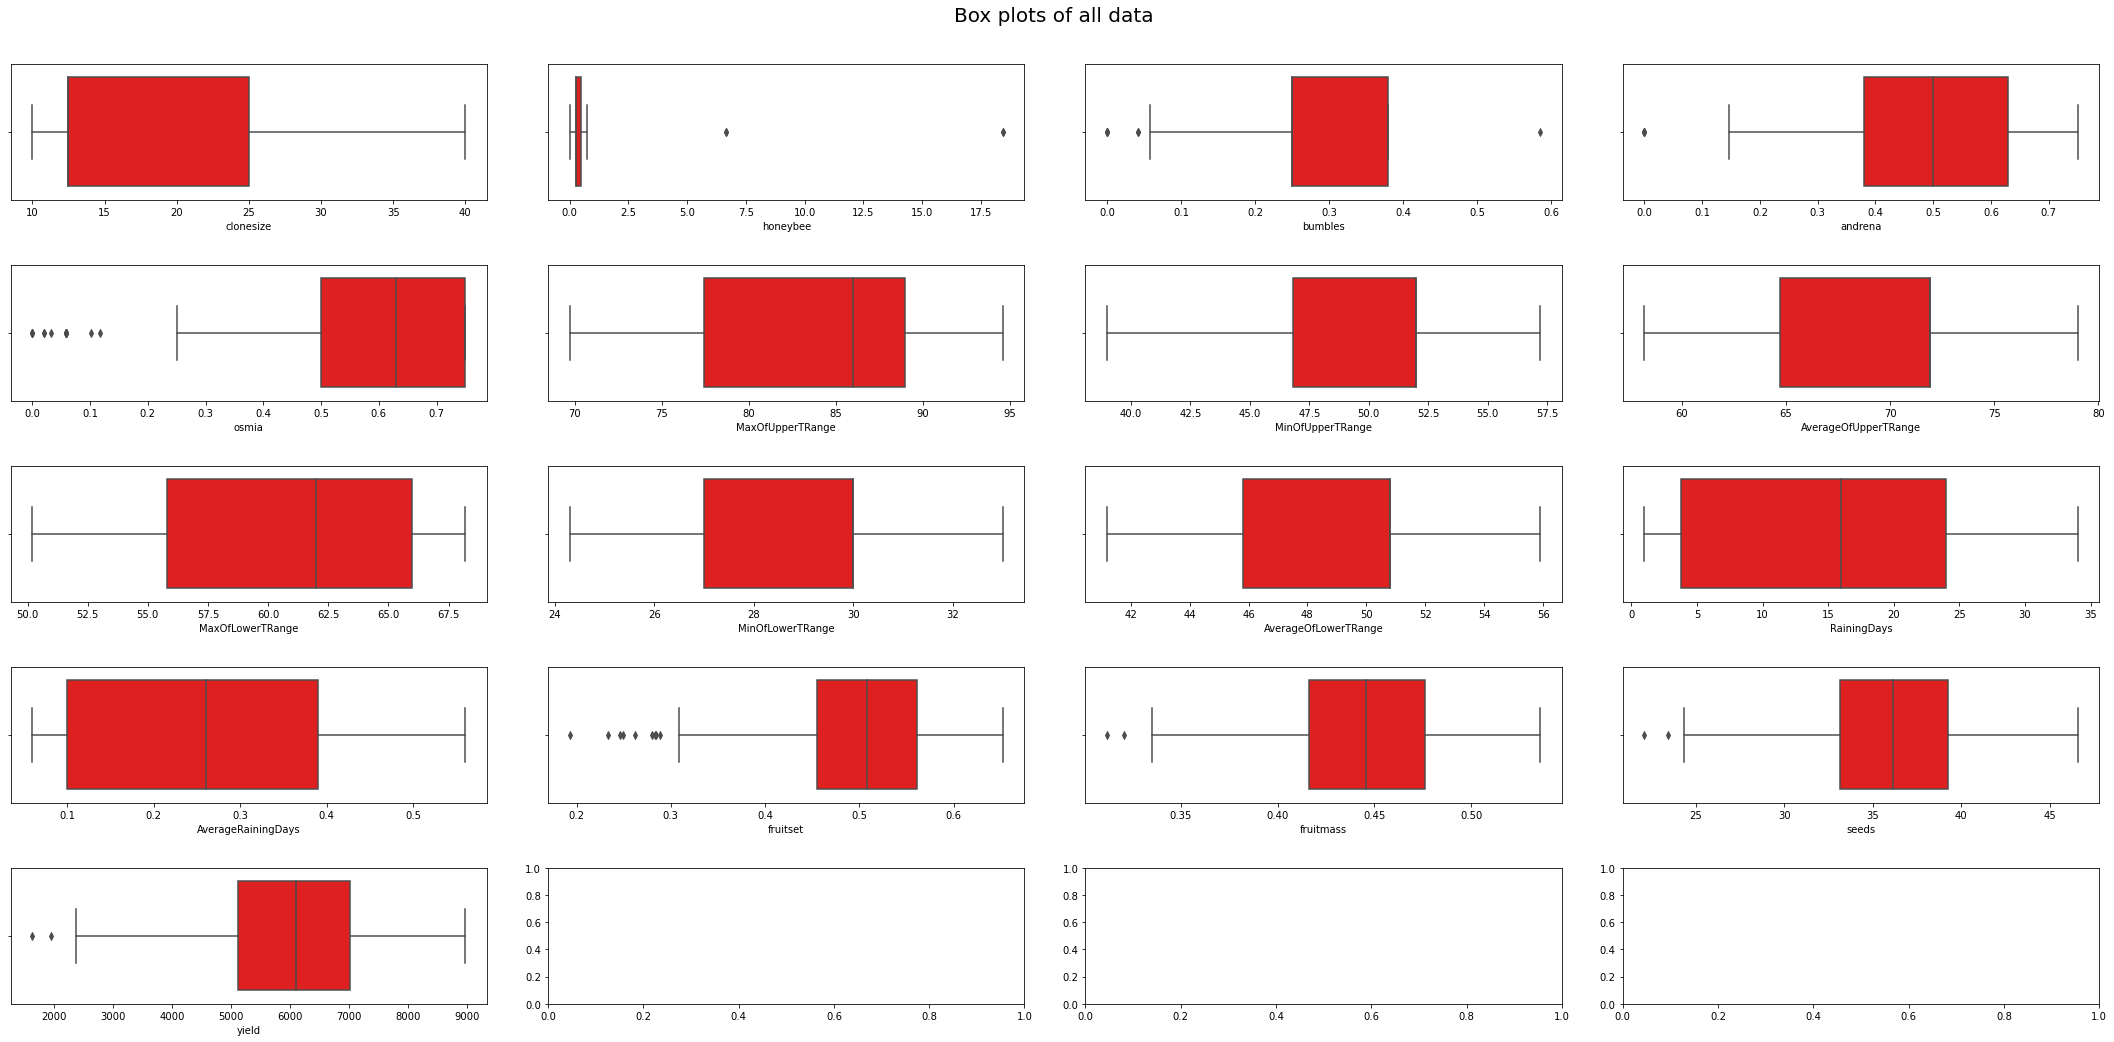

In [17]:
# Checking for outliers in all columns
def show_outlier(features):
    fig,ax = plt.subplots(int(np.ceil(len(df.columns)/4)),4,figsize = (30,15))
    ax = np.ravel(ax)
    for i,col in enumerate(df.columns):
        sns.boxplot(ax = ax[i], x = df[col], color= "red")
    fig.suptitle("Box plots of all data ",fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

show_outlier(df)
# Most outlier values are not extreme
# No outliers are removed to preserve context

# Feature Engineering

In [18]:
# Creating new features (variables) by combining existing features 
df['totalBeeDensity'] = df['honeybee'] + df['bumbles'] + df['andrena'] + df['osmia']
df['averageTRange'] = (df['AverageOfUpperTRange'] + df['AverageOfLowerTRange'])/2

In [19]:
# Dropping unrelevant features that have been either used to create new features or are unneccesary
df.drop(['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds'], axis = 'columns', inplace = True)
df

,clonesize,honeybee,bumbles,andrena,osmia,AverageRainingDays,yield,totalBeeDensity,averageTRange
0,37.5,0.750,0.250,0.250,0.250,0.26,3813.165795,1.500,61.35
1,37.5,0.750,0.250,0.250,0.250,0.10,4947.605663,1.500,61.35
2,37.5,0.750,0.250,0.250,0.250,0.26,3866.798965,1.500,67.45
3,37.5,0.750,0.250,0.250,0.250,0.10,4303.943030,1.500,67.45
4,37.5,0.750,0.250,0.250,0.250,0.39,3436.493543,1.500,61.35
...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,0.06,5333.873335,1.121,61.35
773,40.0,0.537,0.117,0.409,0.058,0.06,3373.436842,1.121,61.35
774,20.0,0.537,0.117,0.409,0.058,0.39,4203.027624,1.121,61.35
775,20.0,0.537,0.117,0.409,0.058,0.06,4166.299735,1.121,55.45


# Secondary Exploratory Data Analysis

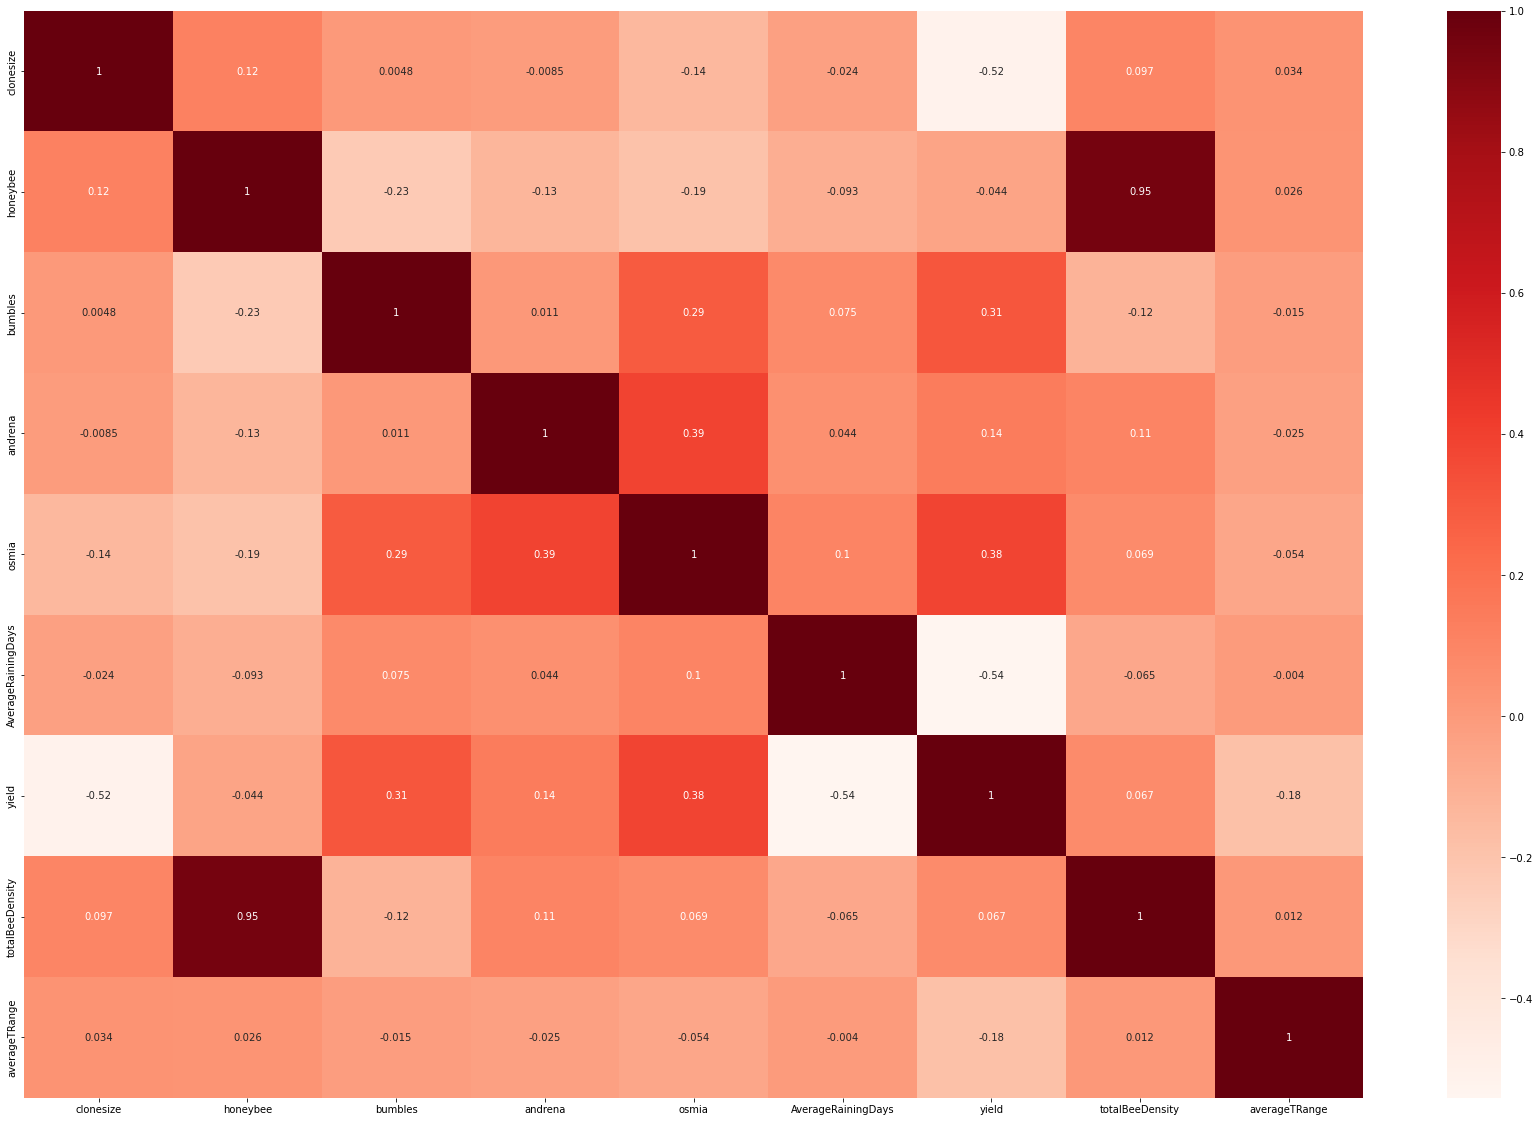

In [20]:
# Creating a heatmap of correlation values between variables
plt.figure(figsize = (30,20))
pearson = df.corr()
sns.heatmap(pearson, annot=True, cmap = plt.cm.Reds)
plt.show()
# The darker the box, the more positively correlated the variables (1 = most positively correlated)
# The lighter the box, the more negatively correlated the variables (-1 = most negatively correlated)

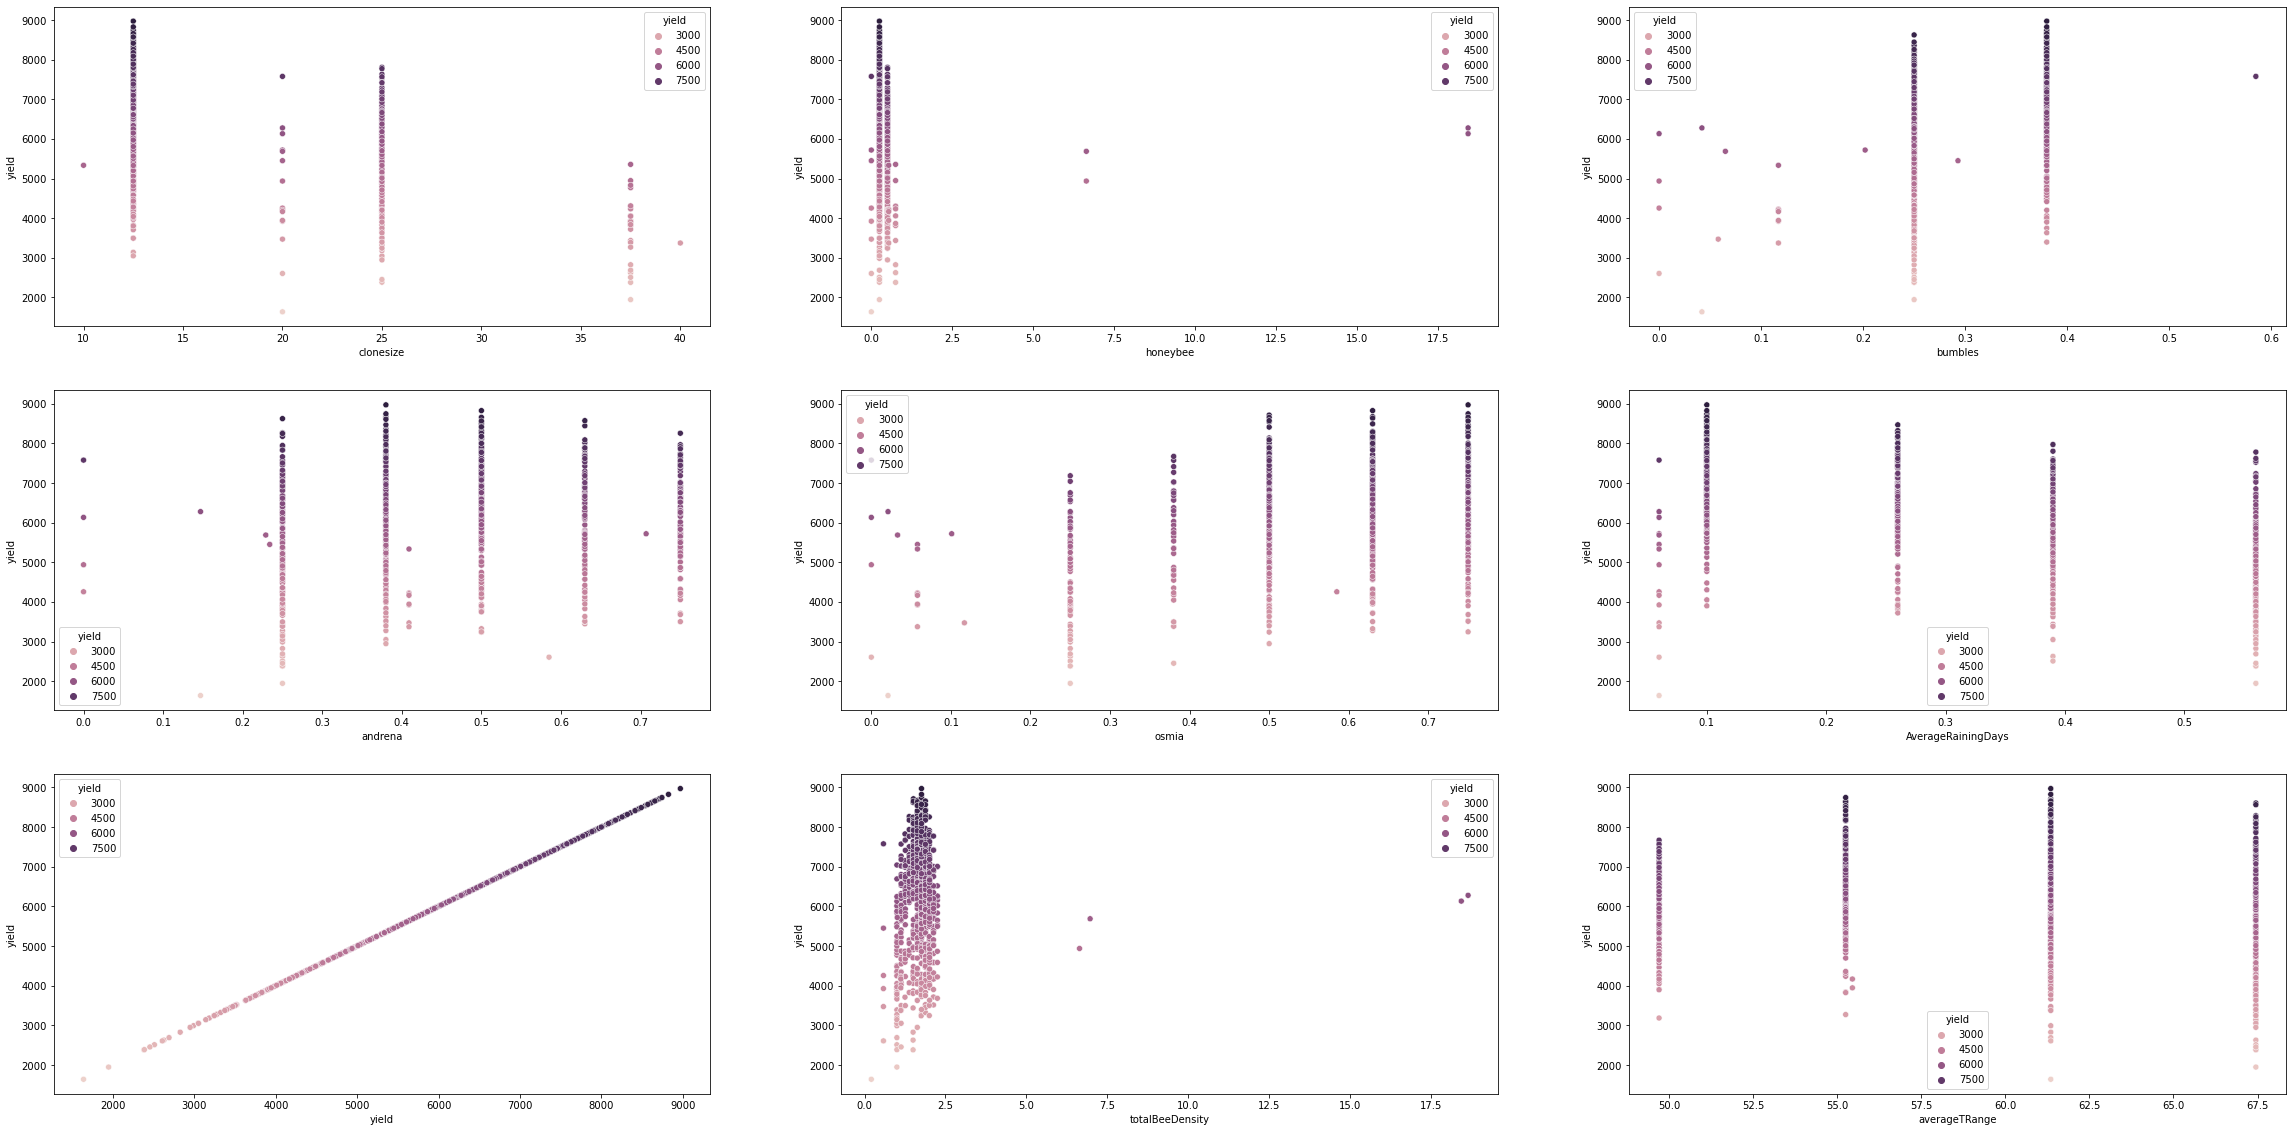

In [21]:
# Creating scatterplots between variables
fig, ax = plt.subplots(3, 3, figsize = (40, 20))
for var, subplot in zip(df, ax.flatten()):
    sns.scatterplot(x = var, y = 'yield',  data = df, ax = subplot, hue = 'yield' )

In [22]:
# Prining the correlation values between variables
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,AverageRainingDays,yield,totalBeeDensity,averageTRange
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,-0.024455,-0.516737,0.097006,0.033676
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,-0.093477,-0.044250,0.953853,0.026068
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,0.075376,0.309407,-0.116495,-0.015061
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,0.043739,0.140277,0.108899,-0.025387
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,0.104188,0.380892,0.069011,-0.054491
AverageRainingDays,-0.024455,-0.093477,0.075376,0.043739,0.104188,1.000000,-0.541215,-0.064739,-0.003960
yield,-0.516737,-0.044250,0.309407,0.140277,0.380892,-0.541215,1.000000,0.067230,-0.181578
totalBeeDensity,0.097006,0.953853,-0.116495,0.108899,0.069011,-0.064739,0.067230,1.000000,0.011741
averageTRange,0.033676,0.026068,-0.015061,-0.025387,-0.054491,-0.003960,-0.181578,0.011741,1.000000


In [23]:
# Finding the features that are most correlated (more than 0.5) with the target variable
core_target = abs(pearson["yield"])
relevant_features = core_target[core_target>0.5]
relevant_features
# The features are 'clonesize', 'AverageRainingDays' and 'yield' (target variable)

clonesize             0.516737
AverageRainingDays    0.541215
yield                 1.000000
Name: yield, dtype: float64

# Feature Selection

In [24]:
# Selecting the features (all variables except 'yield')
features = df.drop('yield', axis = 1)
features

,clonesize,honeybee,bumbles,andrena,osmia,AverageRainingDays,totalBeeDensity,averageTRange
0,37.5,0.750,0.250,0.250,0.250,0.26,1.500,61.35
1,37.5,0.750,0.250,0.250,0.250,0.10,1.500,61.35
2,37.5,0.750,0.250,0.250,0.250,0.26,1.500,67.45
3,37.5,0.750,0.250,0.250,0.250,0.10,1.500,67.45
4,37.5,0.750,0.250,0.250,0.250,0.39,1.500,61.35
...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,0.06,1.121,61.35
773,40.0,0.537,0.117,0.409,0.058,0.06,1.121,61.35
774,20.0,0.537,0.117,0.409,0.058,0.39,1.121,61.35
775,20.0,0.537,0.117,0.409,0.058,0.06,1.121,55.45


In [25]:
# Checking the shape of the feature matrix (must be 2-dimensional)
features.shape

(777, 8)

In [26]:
# Selecting the target variable to be 'yield'
target = df['yield']
target

0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

In [27]:
# Checking the shape of the target vector (must be 1-dimensional)
target.shape

(777,)

# Data Modelling & Testing

In [28]:
X = features
y = target

# Applying standard scaling to the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
# Splitting the data set into a training set and test set
# The split is 80% : 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

# Checking the shape of the training and test sets
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((621, 8), (156, 8), (621,), (156,))

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lgr = LinearRegression()
lgr.fit(X_train, y_train)

LinearRegression()

In [31]:
print("Accuracy score:", lgr.score(X_test, y_test))

Accuracy score: 0.8331791916893514


## KNN Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 12, p = 1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=12, p=1)

In [33]:
print("Accuracy score:", knn.score(X_test, y_test))

Accuracy score: 0.8385046415479037


In [34]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 12,
 'p': 1,
 'weights': 'uniform'}

In [35]:
leaf_size = [i for i in range(0,101)]
n_neighbors = [i for i in range(0,101)]
p = [i for i in range(0,101)]

hyperparemeter_grid = {'leaf_size':leaf_size, 'n_neighbors':n_neighbors, 'p':p}

In [36]:
random_cv = RandomizedSearchCV(estimator = knn, param_distributions = hyperparemeter_grid, cv = 5, n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', n_jobs = 4, verbose = 5, return_train_score = True, 
                               random_state = 42)

In [37]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=12, p=1),
                   n_iter=50, n_jobs=4,
                   param_distributions={'leaf_size': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...],
                                        'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7,
                                                        8, 9, 10, 11, 12, 13,
                                                        14, 15, 16, 17, 18, 19,
                                                        20, 21, 22, 23, 24, 25,
                                                        26, 27, 28, 29, ...],
                                        'p': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11, 12, 13, 14, 15, 16, 17, 18,
                                              19, 20, 21, 22, 23, 24, 25, 26,
                                              27, 28, 29, ...]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [38]:
random_cv.best_estimator_

KNeighborsRegressor(leaf_size=4, n_neighbors=2, p=84)

In [39]:
knn_tuned = KNeighborsRegressor(leaf_size = 4, n_neighbors = 2, p = 84)

In [40]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=4, n_neighbors=2, p=84)

In [41]:
print("Accuracy score:", knn_tuned.score(X_test, y_test))

Accuracy score: 0.887440636418099


## Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 8, random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [43]:
print("Accuracy score:", dtr.score(X_test, y_test))

Accuracy score: 0.8418578852568042


In [44]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [45]:
max_depth = [i for i in range(0,101)]
random_state = [i for i in range(0,101)]
min_samples_leaf = [5, 10, 20, 50, 100]

hyperparemeter_grid = {'max_depth':max_depth, 'random_state':random_state, 'min_samples_leaf':min_samples_leaf}

In [46]:
random_cv = RandomizedSearchCV(estimator = dtr, param_distributions = hyperparemeter_grid, cv = 5, n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', n_jobs = 4, verbose = 5, return_train_score = True, 
                               random_state = 42)

In [47]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=8, random_state=0),
                   n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [48]:
random_cv.best_estimator_

DecisionTreeRegressor(max_depth=21, min_samples_leaf=5, random_state=22)

In [49]:
dtr_tuned = DecisionTreeRegressor(max_depth = 21, min_samples_leaf = 5, random_state = 22)

In [50]:
dtr_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=5, random_state=22)

In [51]:
print("Accuracy score:", dtr_tuned.score(X_test, y_test))

Accuracy score: 0.8641401895944849


## Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
print("Accuracy score:", rfr.score(X_test, y_test))

Accuracy score: 0.8960019128906931


In [54]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
bootstrap = [True, False]
max_depth = [i for i in range(0,101)]
max_features = ['auto', 'sqrt', 'log2']
min_samples_leaf = [i for i in range(0,11)]
min_samples_split = [i for i in range(0,11)]
n_estimators = [i for i in range(0,1000)]

hyperparemeter_grid = {'bootstrap':bootstrap, 'max_depth':max_depth, 'max_features':max_features,
                       'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split,
                       'n_estimators':n_estimators}

In [56]:
random_cv = RandomizedSearchCV(estimator = rfr, param_distributions = hyperparemeter_grid, cv = 5, n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', n_jobs = 4, verbose = 5, return_train_score = True, 
                               random_state = 42)

In [57]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [58]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=58, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=788)

In [59]:
rfr_tuned = RandomForestRegressor(max_depth = 58, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 788)

In [60]:
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=58, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=788)

In [61]:
print("Accuracy score:", rfr_tuned.score(X_test, y_test))

Accuracy score: 0.9057347860596148


## XGBoost Regression

In [62]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
print("Accuracy score:", xgb.score(X_test, y_test))

Accuracy score: 0.938709855617206


In [64]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [65]:
base_score = [i/10.0 for i in range(0,11)]
booster = ['gbtree', 'gblinear', 'dart']
learning_rate = [i/10.0 for i in range(0,11)]
max_depth = [i for i in range(0,11)]
min_child_weight = [i for i in range(0,11)]
n_estimators = [i for i in range(0,500)]

hyperparemeter_grid = {'n_estimators':n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate,
                       'min_child_weight':min_child_weight, 'booster':booster, 'base_score':base_score }

In [66]:
random_cv = RandomizedSearchCV(estimator = xgb, param_distributions = hyperparemeter_grid, cv = 5, n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', n_jobs = 4, verbose = 5, return_train_score = True, 
                               random_state = 42)

In [67]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'learning_rate': [0.0, 0.1, 0.2, 0.3,
                                                          0.4, 0.5, 0.6, 0.7,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'min_child_weight': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [68]:
random_cv.best_estimator_

XGBRegressor(base_score=0.0, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=355, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
xgb_tuned = xgboost.XGBRegressor(base_score=0.0, booster='gbtree', callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None, early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None, feature_types=None,
                                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                                 interaction_constraints=None, learning_rate=0.1, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=7, max_leaves=None,
                                 min_child_weight=8, monotone_constraints=None,
                                 n_estimators=355, n_jobs=None, num_parallel_tree=None,
                                 predictor=None, random_state=None)

In [70]:
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.0, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=355, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
print("Accuracy score:", xgb_tuned.score(X_test, y_test))

Accuracy score: 0.9517915938712024


## AdaBoost Regression

In [72]:
from sklearn.ensemble import AdaBoostRegressor

abt = AdaBoostRegressor()
abt.fit(X_train,y_train)

AdaBoostRegressor()

In [73]:
print("Accuracy score:", abt.score(X_test, y_test))

Accuracy score: 0.8209598838504252


In [74]:
abt.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [75]:
n_estimators = [i for i in range(0,100)]
learning_rate = [i/10.0 for i in range(0,11)]
random_state = [i for i in range(0,11)]
loss = ['linear', 'square', 'exponential']

hyperparemeter_grid = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'random_state':random_state,
                       'loss':loss}

In [76]:
random_cv = RandomizedSearchCV(estimator = abt, param_distributions = hyperparemeter_grid, cv = 5, n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', n_jobs = 4, verbose = 5, return_train_score = True, 
                               random_state = 42)

In [77]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.0, 0.1, 0.2, 0.3,
                                                          0.4, 0.5, 0.6, 0.7,
                                                          0.8, 0.9, 1.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [78]:
random_cv.best_params_

{'random_state': 6, 'n_estimators': 96, 'loss': 'square', 'learning_rate': 0.6}

In [79]:
abt_tuned = AdaBoostRegressor(random_state = 6, n_estimators = 96, loss = "square", learning_rate = 0.6)

In [80]:
abt_tuned.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.6, loss='square', n_estimators=96,
                  random_state=6)

In [81]:
print("Accuracy score:", abt_tuned.score(X_test, y_test))

Accuracy score: 0.8424896439140124


## CatBoost Regression

In [82]:
from catboost import CatBoostRegressor

cbt = CatBoostRegressor()
cbt.fit(X_train, y_train)

Learning rate set to 0.037974
0:	learn: 1309.7822777	total: 141ms	remaining: 2m 20s
1:	learn: 1276.0329016	total: 141ms	remaining: 1m 10s
2:	learn: 1250.9728168	total: 142ms	remaining: 47.2s
3:	learn: 1218.9426708	total: 143ms	remaining: 35.5s
4:	learn: 1187.0887591	total: 144ms	remaining: 28.6s
5:	learn: 1159.8675859	total: 144ms	remaining: 23.9s
6:	learn: 1131.0793534	total: 145ms	remaining: 20.5s
7:	learn: 1105.5334572	total: 145ms	remaining: 18s
8:	learn: 1081.6732200	total: 146ms	remaining: 16.1s
9:	learn: 1054.8137819	total: 147ms	remaining: 14.5s
10:	learn: 1029.6097652	total: 147ms	remaining: 13.2s
11:	learn: 1009.6809468	total: 148ms	remaining: 12.2s
12:	learn: 987.6184000	total: 149ms	remaining: 11.3s
13:	learn: 965.7739452	total: 149ms	remaining: 10.5s
14:	learn: 946.3222301	total: 150ms	remaining: 9.82s
15:	learn: 925.7650344	total: 150ms	remaining: 9.23s
16:	learn: 906.6091777	total: 151ms	remaining: 8.71s
17:	learn: 887.3308291	total: 151ms	remaining: 8.25s
18:	learn: 868

In [83]:
print("Accuracy score:", cbt.score(X_test, y_test))

Accuracy score: 0.9492259844716782


In [84]:
cbt.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.037973999977111816,
 'score_function': 

In [85]:
depth = [i for i in range(0,17)]
iterations = [i for i in range(0,1000)]
learning_rate = [i/10.0 for i in range(0,11)]
l2_leaf_reg = [i for i in range(0,11)]

hyperparemeter_grid = {'depth':depth, 'iterations':iterations, 'learning_rate':learning_rate,'l2_leaf_reg':l2_leaf_reg}

In [86]:
random_cv = RandomizedSearchCV(estimator = cbt, param_distributions = hyperparemeter_grid, cv = 5, n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', n_jobs = 4, verbose = 5, return_train_score = True, 
                               random_state = 42)

In [87]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 1268.7193964	total: 633us	remaining: 345ms
1:	learn: 1197.8935719	total: 1.45ms	remaining: 394ms
2:	learn: 1133.2908011	total: 2.03ms	remaining: 368ms
3:	learn: 1078.4457617	total: 2.55ms	remaining: 345ms
4:	learn: 1032.5889950	total: 3.08ms	remaining: 333ms
5:	learn: 990.9019457	total: 3.54ms	remaining: 318ms
6:	learn: 940.6841748	total: 4.07ms	remaining: 313ms
7:	learn: 890.9316302	total: 4.6ms	remaining: 309ms
8:	learn: 853.2219660	total: 5.11ms	remaining: 305ms
9:	learn: 820.3814795	total: 5.59ms	remaining: 300ms
10:	learn: 791.2386508	total: 6.11ms	remaining: 297ms
11:	learn: 758.8890572	total: 6.69ms	remaining: 298ms
12:	learn: 734.2525015	total: 7.24ms	remaining: 297ms
13:	learn: 708.6480005	total: 7.75ms	remaining: 295ms
14:	learn: 686.4526577	total: 8.24ms	remaining: 292ms
15:	learn: 664.0924329	total: 8.75ms	remaining: 290ms
16:	learn: 644.8620700	total: 9.27ms	remaining: 289ms
17:	learn: 628.3997987	tota

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000203A6B35100>,
                   n_iter=50, n_jobs=4,
                   param_distributions={'depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10, 11, 12, 13, 14, 15, 16],
                                        'iterations': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, ...],
                                        'l2_leaf_reg': [0, 1, 2, 3, 4, 5, 6, 7,
                                                        8, 9, 10],
                                        'learning_rate': [0.0, 0.1, 0.2, 0.3,
                                                          0.4, 0.5, 0.6, 0.7,
                                                          0.8, 0.9, 1.0]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [88]:
random_cv.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 8, 'iterations': 546, 'depth': 5}

In [89]:
cbt_tuned = CatBoostRegressor(learning_rate = 0.1, l2_leaf_reg = 8, iterations = 546, depth = 5)

In [90]:
cbt_tuned.fit(X_train, y_train)

0:	learn: 1268.7193964	total: 914us	remaining: 499ms
1:	learn: 1197.8935719	total: 1.87ms	remaining: 510ms
2:	learn: 1133.2908011	total: 2.8ms	remaining: 507ms
3:	learn: 1078.4457617	total: 3.77ms	remaining: 511ms
4:	learn: 1032.5889950	total: 5.21ms	remaining: 564ms
5:	learn: 990.9019457	total: 5.97ms	remaining: 537ms
6:	learn: 940.6841748	total: 7.24ms	remaining: 557ms
7:	learn: 890.9316302	total: 7.99ms	remaining: 537ms
8:	learn: 853.2219660	total: 8.68ms	remaining: 518ms
9:	learn: 820.3814795	total: 9.4ms	remaining: 504ms
10:	learn: 791.2386508	total: 10.3ms	remaining: 500ms
11:	learn: 758.8890572	total: 11.3ms	remaining: 505ms
12:	learn: 734.2525015	total: 12.5ms	remaining: 511ms
13:	learn: 708.6480005	total: 13.8ms	remaining: 524ms
14:	learn: 686.4526577	total: 14.9ms	remaining: 527ms
15:	learn: 664.0924329	total: 15.5ms	remaining: 515ms
16:	learn: 644.8620700	total: 16.1ms	remaining: 502ms
17:	learn: 628.3997987	total: 16.7ms	remaining: 490ms
18:	learn: 604.5793208	total: 17.4ms

In [91]:
print("Accuracy score:", cbt_tuned.score(X_test, y_test))

Accuracy score: 0.9490463221027


# Stacking Regression Pipeline

In [92]:
from prettytable import PrettyTable

t = PrettyTable(['Model', 'Accuracy Score'])
t.add_row(['Linear Regression', '%.3f' % lgr.score(X_test, y_test)])
t.add_row(['K-Nearest Neighbour (KNN) Regression', '%.3f' % knn_tuned.score(X_test, y_test)])
t.add_row(['Decision Tree Regression', '%.3f' % dtr_tuned.score(X_test, y_test)])
t.add_row(['Random Forest Regression', '%.3f' % rfr_tuned.score(X_test, y_test)])
t.add_row(['XGBoost Regression', '%.3f' % xgb_tuned.score(X_test, y_test)])
t.add_row(['AdaBoost Regression', '%.3f' % abt_tuned.score(X_test, y_test)])
t.add_row(['CatBoost Regression', '%.3f' % cbt_tuned.score(X_test, y_test)])
print(t)

+--------------------------------------+----------------+
|                Model                 | Accuracy Score |
+--------------------------------------+----------------+
|          Linear Regression           |     0.833      |
| K-Nearest Neighbour (KNN) Regression |     0.887      |
|       Decision Tree Regression       |     0.864      |
|       Random Forest Regression       |     0.906      |
|          XGBoost Regression          |     0.952      |
|         AdaBoost Regression          |     0.842      |
|         CatBoost Regression          |     0.949      |
+--------------------------------------+----------------+


In [93]:
from sklearn.ensemble import StackingRegressor
from sklego.linear_model import LADRegression
from sklearn.pipeline import Pipeline, make_pipeline

estimators = [("pipe_rfr", rfr_tuned), ("pipe_xgb", xgb_tuned), ("pipe_cbt", cbt_tuned)]
stacking_regressor = StackingRegressor(estimators = estimators, final_estimator = LADRegression(alpha = 0.001))

In [94]:
final_pipe = Pipeline(steps = [('stacking_regressor', stacking_regressor)])
final_pipe

Pipeline(steps=[('stacking_regressor',
                 StackingRegressor(estimators=[('pipe_rfr',
                                                RandomForestRegressor(max_depth=58,
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=5,
                                                                      n_estimators=788)),
                                               ('pipe_xgb',
                                                XGBRegressor(base_score=0.0,
                                                             booster='gbtree',
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             early_stopping_rounds=None,
                                                             enable_cate...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=7,
                                                             max_leaves=None,
                                                             min_child_weight=8,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=355,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...)),
                                               ('pipe_cbt',
                                                <catboost.core.CatBoostRegressor object at 0x00000203A7BF4A30>)],
                                   final_estimator=LADRegression(alpha=0.001)))])

In [95]:
stacked_regressor =  final_pipe.fit(X_train, y_train)

0:	learn: 1268.7193964	total: 671us	remaining: 366ms
1:	learn: 1197.8935719	total: 1.4ms	remaining: 380ms
2:	learn: 1133.2908011	total: 2.02ms	remaining: 365ms
3:	learn: 1078.4457617	total: 2.6ms	remaining: 353ms
4:	learn: 1032.5889950	total: 3.2ms	remaining: 346ms
5:	learn: 990.9019457	total: 3.68ms	remaining: 331ms
6:	learn: 940.6841748	total: 4.25ms	remaining: 327ms
7:	learn: 890.9316302	total: 4.8ms	remaining: 323ms
8:	learn: 853.2219660	total: 5.37ms	remaining: 320ms
9:	learn: 820.3814795	total: 5.97ms	remaining: 320ms
10:	learn: 791.2386508	total: 6.55ms	remaining: 319ms
11:	learn: 758.8890572	total: 7.16ms	remaining: 319ms
12:	learn: 734.2525015	total: 7.72ms	remaining: 316ms
13:	learn: 708.6480005	total: 8.29ms	remaining: 315ms
14:	learn: 686.4526577	total: 8.84ms	remaining: 313ms
15:	learn: 664.0924329	total: 9.44ms	remaining: 313ms
16:	learn: 644.8620700	total: 10.1ms	remaining: 314ms
17:	learn: 628.3997987	total: 10.7ms	remaining: 315ms
18:	learn: 604.5793208	total: 11.3ms	r

# Model Evaluation

In [96]:
print("Accuracy Score:", stacked_regressor.score(X_test, y_test))

Accuracy Score: 0.9497808483414489


In [97]:
print("Adjusted R-Squared Score:", 1 - (1-stacked_regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Adjusted R-Squared Score: 0.9835309803681175


In [98]:
y_pred = stacked_regressor.predict(X_test)

In [99]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 181.34099222987717
Mean Squared Error (MSE): 97607.3349579907
Root Mean Squared Error (RMSE): 312.42172612990714


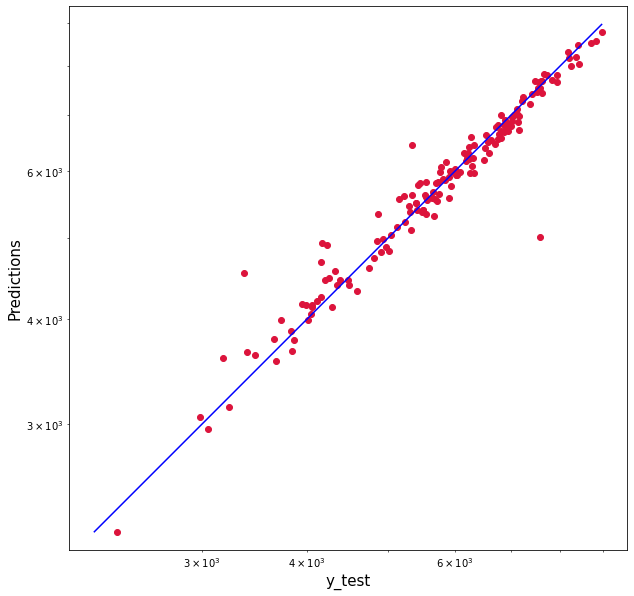

In [100]:
Mod